# Download Dataset

In [ ]:
!kaggle datasets download akram24/google-stock-price-test
!unzip google-stock-price-test.zip
!rm google-stock-price-test.zip
!kaggle datasets download akram24/google-stock-price-train
!unzip google-stock-price-train.zip
!rm google-stock-price-train.zip

# Read Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_data = pd.read_csv('./Google_Stock_Price_Train.csv')
train_data

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
5,1/10/2012,313.70,315.72,307.30,621.43,"8,824,000"
6,1/11/2012,310.59,313.52,309.40,624.25,"4,817,800"
7,1/12/2012,314.43,315.26,312.08,627.92,"3,764,400"
8,1/13/2012,311.96,312.30,309.37,623.28,"4,631,800"
9,1/17/2012,314.81,314.81,311.67,626.86,"3,832,800"


In [2]:
from sklearn.preprocessing import MinMaxScaler

# get open data
training = train_data.iloc[:, 1:2].values

sc = MinMaxScaler(feature_range = (0, 1))

In [3]:
train_data = []
label = []
# set parameter
days = 60
out_days = 1
dataset_count = len(training)
# create dataset
for i in range(days, dataset_count-out_days):  # 1258 是訓練集總數
    training_sc = sc.fit_transform(training[i-days:i+out_days, :])
    train_data.append(training_sc[:days, 0])
    label.append(training_sc[days:days+out_days, 0])
# change to np array
train_data, label = np.asarray(train_data), np.asarray(label)
# print(train_data, label)

# fix dim
train_data = np.expand_dims(train_data, -1)
print(train_data.shape, label.shape)

(1197, 60, 1) (1197, 1)


# Create Model

/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
flatten (Flatten)            (None, 3000)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               384128    
_________________________________________________________________
dense_1 (Dense)              (None, 40)                5160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 41        
Total params: 399,729
Trainable params: 399,729
Non-trainable params: 0
_________________________________________________________________


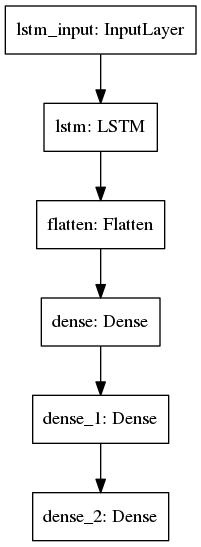

In [4]:
# LSTM Training
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten
from tensorflow.keras.utils import plot_model

reshape_size = days

model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (reshape_size, 1), dropout=0.2))
model.add(Flatten())
model.add(Dense(units = 128))
model.add(Dense(units = 40))
model.add(Dense(units = out_days))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()
plot_model(model, 'model.png')

In [5]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_file = './model/LSTM_00_check_point/cp-{epoch:04d}.ckpt'
cp_callback = ModelCheckpoint(checkpoint_file, save_weights_only=True, verbose=1, period=10)
train = model.fit(train_data, label, epochs=100, batch_size=50, callbacks=[cp_callback])
model.save('./model/LSTM_00.h5')

W0909 09:27:34.160742 140323532310272 callbacks.py:875] `period` argument is deprecated. Please use `save_freq` to specify the frequency in number of samples seen.
W0909 09:27:34.327861 140323532310272 deprecation.py:323] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
1197/1197 [==============================] - 7s 5ms/sample - loss: 0.5576
Epoch 2/100
1197/1197 [==============================] - 3s 2ms/sample - loss: 0.0939
Epoch 3/100
1197/1197 [==============================] - 3s 2ms/sample - loss: 0.0570
Epoch 4/100
1197/1197 [==============================] - 3s 2ms/sample - loss: 0.0486
Epoch 5/100
1197/1197 [==============================] - 3s 2ms/sample - loss: 0.0427
Epoch 6/100
1197/1197 [==============================] - 3s 2ms/sample - loss: 0.0459
Epoch 7/100
1197/1197 [==============================] - 3s 2ms/sample - loss: 0.0392
Epoch 8/100
1197/1197 [==============================] - 3s 2ms/sample - loss: 0.0411
Epoch 9/100
1197/1197 [==============================] - 3s 2ms/sample - loss: 0.0404
Epoch 10/100
1150/1197 [===========================>..] - ETA: 0s - loss: 0.0404
Epoch 00010: saving model to ./model/LSTM_00_check_point/cp-0010.ckpt
1197/1197 [==============================] - 3s 2ms/sample - loss: 0.0408
E

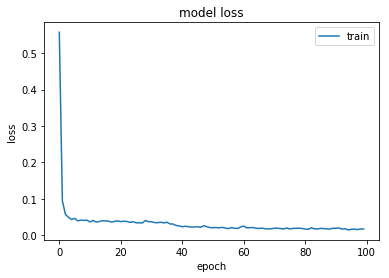

In [6]:
plt.plot(train.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Testing

In [7]:
from sklearn.preprocessing import StandardScaler

sc = MinMaxScaler(feature_range = (0, 1))
test_data = pd.read_csv('./Google_Stock_Price_Test.csv')
testing = test_data.iloc[:, 1:2].values
testing_count = len(testing)
print('testing data count : ', testing_count)
# get 70 extra from training
dataset = np.append(training, testing)
dataset_count = len(dataset)
print('total dataset data count : ', dataset_count)
x_test_data = dataset[dataset_count-testing_count-reshape_size:]
print(x_test_data.shape)
x_test_data = sc.fit_transform(np.expand_dims(x_test_data, -1))
print(x_test_data.shape)
# create test set
x_test = []
for i in range(testing_count):
    x_test.append(x_test_data[i:i+reshape_size, :])
x_test = np.asarray(x_test)
print('test set shape : ', x_test.shape)

testing data count :  20
total dataset data count :  1278
(80,)
(80, 1)
test set shape :  (20, 60, 1)


In [8]:
output = model.predict(x_test)
output_prices = sc.inverse_transform(output)
print(output_prices.shape, output_prices)

(20, 1) [[781.5562 ]
 [780.8527 ]
 [786.75995]
 [787.8174 ]
 [792.5958 ]
 [800.6275 ]
 [804.36066]
 [800.82153]
 [799.0202 ]
 [801.86786]
 [802.0846 ]
 [801.49225]
 [797.65967]
 [797.3363 ]
 [800.1245 ]
 [808.29144]
 [815.2586 ]
 [824.1516 ]
 [819.78827]
 [802.64575]]


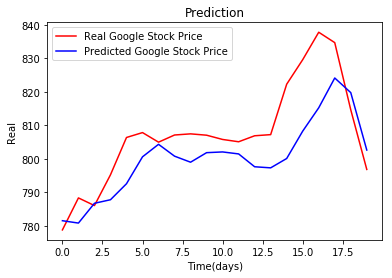

In [9]:
# Visualising the results
plt.plot(testing, color = 'red', label = 'Real Google Stock Price')
plt.plot(output_prices[:, 0], color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Prediction')
plt.xlabel('Time(days)')
plt.ylabel('Real')
plt.legend()
plt.show()